# Packages

In [247]:
#import numpy and pandas with alias np and pd, respectively
import numpy as np
import pandas as pd
from pandas import DataFrame as df

#import other packages
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import Data for Q0

In [248]:
#import data
data = pd.read_csv("231553_two_tone_vs_coupler_flux_Q0.csv", skiprows=8, index_col=[0,1])

In [249]:
data.head()

amplitude     phase
current frequency                        
-0.001  5.350000e+09   0.005065  0.559620
        5.350600e+09   0.005177  0.567793
        5.351200e+09   0.005174  0.545816
        5.351800e+09   0.005160  0.540931
        5.352400e+09   0.005135  0.551144

In [250]:
data['phase'].values

array([0.55961968, 0.56779307, 0.54581602, ..., 0.55206943, 0.54560492,
       0.56854202])

In [251]:
y = np.unique(np.round(data.index.get_level_values(1), 6).values)

In [252]:
x = (np.unique(np.round(data.index.get_level_values(0), 6).values)*1000)

In [253]:
new_shape = data.index.levshape

In [254]:
phase = np.reshape(data['phase'].values, new_shape)

<function matplotlib.pyplot.show(close=None, block=None)>

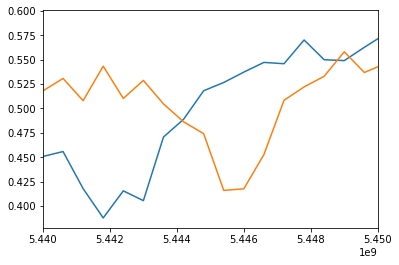

In [260]:
new_x = phase[25,:]
y = y

newer_x = phase[0,:]
y = y

plt.plot(y, new_x)
plt.plot(y, newer_x)

plt.xlim(5.44e9, 5.45e9)
plt.show

# Import Data For Q1

In [263]:
#import data
data1 = pd.read_csv("173636_two_tone_vs_coupler_flux_Q1.csv", skiprows=8, index_col=[0,1])

data1.head()

amplitude     phase
current frequency                        
-0.001  5.150000e+09   0.005963 -0.682080
        5.150600e+09   0.005797 -0.667013
        5.151200e+09   0.005830 -0.679327
        5.151800e+09   0.005882 -0.673331
        5.152400e+09   0.005838 -0.671474

In [264]:
#assign x and y values
x1 = (np.unique(np.round(data1.index.get_level_values(0), 6).values)*1000)
y1 = np.unique(np.round(data1.index.get_level_values(1), 6).values)

In [265]:
#index values
newer_shape = data1.index.levshape
phase1 = np.reshape(data1['phase'].values, newer_shape)

# Combine Q0 and Q1 on graph

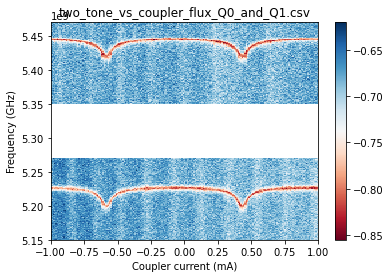

In [278]:
# naming the x axis
plt.xlabel('Coupler current (mA)')
# naming the y axis
plt.ylabel('Frequency (GHz)')
  
# giving a title to my graph
plt.title('two_tone_vs_coupler_flux_Q0_and_Q1.csv')

plt.pcolormesh(x,y,phase.T, cmap='RdBu')
plt.pcolormesh(x1,y1,phase1.T, cmap='RdBu')

plt.colorbar()

# Displaying the figure
plt.show()

# Q0 Frequency Data

In [308]:
f = x

minima = list()

for f in range(201):
    
    new_x = phase[f,:]
    y[np.argmin(new_x)]
    
    minima.append(y[np.argmin(new_x)])

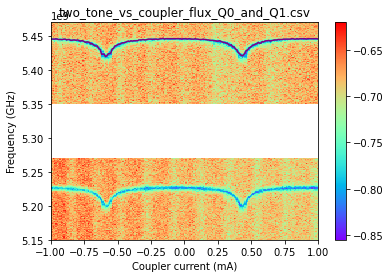

In [310]:
##graph new frequency data

# naming the x axis
plt.xlabel('Coupler current (mA)')
# naming the y axis
plt.ylabel('Frequency (GHz)')
  
# giving a title to my graph
plt.title('two_tone_vs_coupler_flux_Q0_and_Q1.csv')

plt.pcolormesh(x,y,phase.T, cmap='rainbow')
plt.pcolormesh(x1,y1,phase1.T, cmap='rainbow')
plt.plot(x, minima, color='purple')

plt.colorbar()

# Displaying the figure
plt.show()

# Q1 Frequency Data

In [318]:
p = x1

minimam = list()

for p in range(201):
    
    newer_x = phase1[p,:]
    y1[np.argmin(newer_x)]
    
    minimam.append(y1[np.argmin(newer_x)])

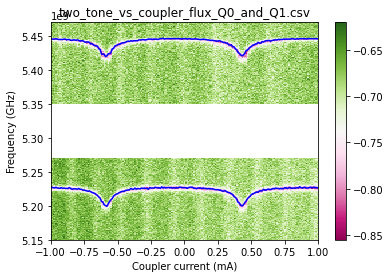

In [323]:
##graph new frequency data

# naming the x axis
plt.xlabel('Coupler current (mA)')
# naming the y axis
plt.ylabel('Frequency (GHz)')
  
# giving a title to my graph
plt.title('two_tone_vs_coupler_flux_Q0_and_Q1.csv')

plt.pcolormesh(x,y,phase.T, cmap='PiYG')
plt.pcolormesh(x1,y1,phase1.T, cmap='PiYG')
plt.plot(x, minima, color='blue')
plt.plot(x1, minimam, color='blue')

plt.colorbar()

# Displaying the figure
plt.show()

# Fit Q0

In [394]:
#import Model
from scipy import signal as sg
import matplotlib
import lmfit
from lmfit.models import Model
from numpy import sqrt, pi, cos

In [395]:
def frequency(I, fmax, p, M, I0):
    return fmax / (sqrt(1-p+(p/(abs(cos(M*pi*(I-I0)))))))

pmodel = Model(frequency)

In [409]:
apple = minima[45:145]
banana = x[45:145]

In [410]:
result = pmodel.fit(apple, I=banana, fmax=5445000000, p=1e-4, M=1, I0=-0.05)

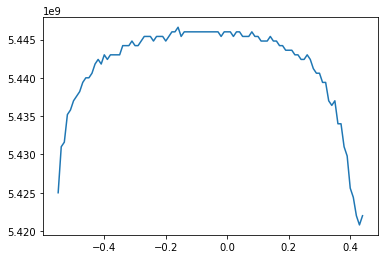

In [411]:
plt.plot(banana, apple)

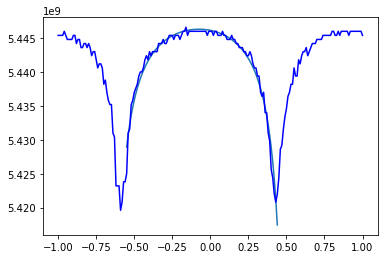

In [413]:
plt.plot(banana, result.eval(params=result.params, I=banana))


plt.plot(x, minima, color='blue')

In [414]:
print(result.params)

Parameters([('fmax', <Parameter 'fmax', value=5446303649.675925 +/- 1.44e+05, bounds=[-inf:inf]>), ('p', <Parameter 'p', value=0.0031058464456860404 +/- 0.000217, bounds=[-inf:inf]>), ('M', <Parameter 'M', value=0.8301533051220009 +/- 0.0104, bounds=[-inf:inf]>), ('I0', <Parameter 'I0', value=-0.07518548913779151 +/- 0.00154, bounds=[-inf:inf]>)])


# Fit Q1

In [416]:
def frequency(I, fmax, p, M, I0):
    return fmax / (sqrt(1-p+(p/(abs(cos(M*pi*(I-I0)))))))

pmodel = Model(frequency)

In [439]:
strawberry = minimam[45:142]
blueberry = x[45:142]

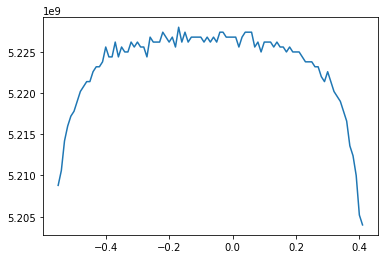

In [440]:
plt.plot(blueberry, strawberry)

In [443]:
result1 = pmodel.fit(strawberry, I=blueberry, fmax=5225000000, p=1e-4, M=1, I0=-0.05)

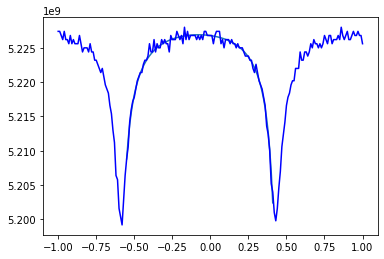

In [445]:
plt.plot(blueberry, result1.eval(params=result1.params, I=blueberry))

plt.plot(x1, minimam, color='blue')

In [446]:
print(result.params)

Parameters([('fmax', <Parameter 'fmax', value=5446303649.675925 +/- 1.44e+05, bounds=[-inf:inf]>), ('p', <Parameter 'p', value=0.0031058464456860404 +/- 0.000217, bounds=[-inf:inf]>), ('M', <Parameter 'M', value=0.8301533051220009 +/- 0.0104, bounds=[-inf:inf]>), ('I0', <Parameter 'I0', value=-0.07518548913779151 +/- 0.00154, bounds=[-inf:inf]>)])
